In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd

## Reading data

In [13]:
data = pd.read_csv('testparticles.csv')

In [14]:
data

,Smaxis,InitialEcc,MeanAnomaly,MaxEcc,Lifetime,MaxInc,MaxSmaxis
0,0.005000,0.00005,5.006660,0.001610,125.663706,0.00005,0.005004
1,0.007222,0.00005,6.043734,0.004249,125.663706,0.00005,0.007222
2,0.009444,0.00005,4.670384,0.018214,125.663706,0.00005,0.009513
3,0.011667,0.00005,2.290923,0.040459,125.663706,0.00005,0.011722
4,0.013889,0.00005,2.289513,0.045383,125.663706,0.00005,0.014058
...,...,...,...,...,...,...,...
95,0.016111,0.30000,0.258862,0.300000,125.663706,0.00005,0.016378
96,0.018333,0.30000,4.155423,0.439541,125.663706,0.00005,0.018522
97,0.020556,0.30000,3.863530,0.405279,125.663706,0.00005,0.020556
98,0.022778,0.30000,5.957645,0.300000,13.962634,0.00005,0.022778


## Maximum Eccentricity map

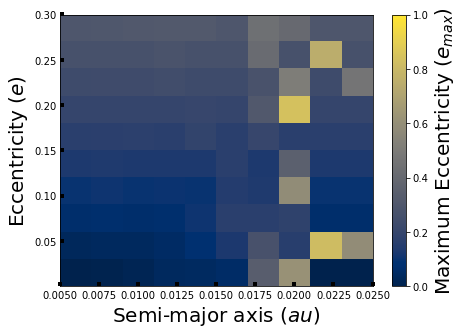

In [18]:
Ngrid = int(np.sqrt(len(data.index)))
eccmax2d = np.array(data['MaxEcc']).reshape(Ngrid,Ngrid)

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(data['Smaxis']),max(data['Smaxis']),min(data['InitialEcc']),max(data['InitialEcc'])]

ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("Semi-major axis ($au$)", fontsize=20)
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("Eccentricity ($e$)", fontsize=20)
#plt.xticks(np.arange(extent[0],extent[1]+0.005,0.005),fontsize=20) 
#plt.yticks(np.arange(extent[2],extent[3]+0.1,0.1),fontsize=20)
ax.tick_params(axis='both', direction='in',length = 4.0, width = 4.0,grid_alpha=0)   #grid_alpha=0 transparent

im = ax.imshow(eccmax2d, interpolation="none", vmin=0, vmax=1, cmap="cividis", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=ax) 
cb.set_label("Maximum Eccentricity ($e_{max}$)",fontsize=20)
plt.savefig('maxeccmap.png',bbox_inches='tight')

## Lifetime map

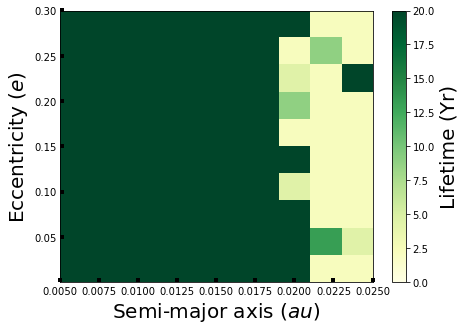

In [19]:
Ngrid = int(np.sqrt(len(data.index)))
lifetimes2d = (np.array(data['Lifetime']).reshape(Ngrid,Ngrid))/(2*np.pi)

fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)
extent = [min(data['Smaxis']),max(data['Smaxis']),min(data['InitialEcc']),max(data['InitialEcc'])]

ax.set_xlim(extent[0],extent[1])
ax.set_xlabel("Semi-major axis ($au$)", fontsize=20)
ax.set_ylim(extent[2],extent[3])
ax.set_ylabel("Eccentricity ($e$)", fontsize=20)
#plt.xticks(np.arange(extent[0],extent[1]+0.005,0.005),fontsize=20) 
#plt.yticks(np.arange(extent[2],extent[3]+0.1,0.1),fontsize=20)
ax.tick_params(axis='both', direction='in',length = 4.0, width = 4.0,grid_alpha=0)   #grid_alpha=0 transparent


im = ax.imshow(lifetimes2d, interpolation="none", vmin=0, vmax=np.max(lifetimes2d),\
               cmap="YlGn", origin="lower", aspect='auto', extent=extent)
cb = plt.colorbar(im, ax=ax) 
cb.set_label("Lifetime (Yr)",fontsize=20)
plt.savefig('Lifetime.png',bbox_inches='tight')